<a href="https://colab.research.google.com/github/Arseniy16/Computational_Math/blob/main/sem_6/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 4

### **Задание №10** *(из сборника Демченко "Вычислительный практикум по прикладной математике", Лабораторная работа №4, Вариант 3)*

---

### Метода прогонки для решения краевой задачи с переменными кусочно-гладкими коэффициентами

Найти решение краевой задачи для одномерного стационарного уравнения теплопроводности:
$$
\frac{d}{dx}[k(x)\frac{du}{dx}] - q(x)u = -f(x), \\ 
$$

в одиннадцати равноудалённых точках отрезка с относительной точностью 𝝴 ≈ 0.0001

---


Краевые условия задачи:$\quad$ $u(0) = 0; u(1) = 1$

Дополнительные условия в точке разрыва:

$$
\begin{cases}
    u(x_0 - 0) = u(x_0 + 0), \\
    k(x_0 - 0) u_x(x_0 - 0) = k(x_0 + 0) u_x(x_0 + 0),
\end{cases}
$$

$$
\begin{aligned} 
& x < x_0 = \dfrac{1}{\sqrt{2}}:\qquad k(x) = x^2 + 0.5;\quad q(x) = e^{-x^2};\quad f(x) = cos(x)\\
& x > x_0 = \dfrac{1}{\sqrt{2}}:\qquad k(x) = x^2 + 0.5;\quad q(x) = 1;\quad f(x) = 1
\end{aligned}
$$
<br>
Модельная задача: 
$$ x_0 = \dfrac{1}{\sqrt{2}}:\qquad k(x) = k(x_0);\quad q(x) = q(x_0);\quad f(x) = f(x_0) $$

---

### *Теоретические сведения*

Решение данной начинают с введения в области интегрирования сетки, например, разбивая отрезок $[0,1]$ равномерно на $L$ частей так, что расстояние между соседними узлами постоянно и равно $h=1 / L$.  
Совокупность точек $x_0 = 0, ~x_{\ell}= x_0 + \ell h, \ell=\overline{0 \div L}$ образует сетку.  
<br>
Пусть точка разрыва первого рода $x_0$ расположена между узлами $\ell_\alpha$ и $\ell_\beta$, так что $x_{\ell_{\prime \prime}} \leq x_0 \leq x_{\ell_\beta}, 0<\ell_\alpha, \ell_\beta<L$. Сформулируем разностную задачу, заменив во внутренних узловых точках $x_{\ell}, \ell=\overline{1 \div \ell_\alpha-1}, \ell=\overline{\ell_\beta+1 \div L-1}$ в дифференциальном уравнении производные конечноразностными отношениями и использовав следуюшие обозначения:

$$
\begin{aligned}
& k_\alpha\left(x_{\ell} \pm h / 2\right)=k_\alpha\left(x_{\ell \pm 1 / 2}\right)=\left(k_\alpha\right)_{\ell \pm 1 / 2} \text {; } \\
& k_\beta\left(x_{\ell} \pm h / 2\right)=k_\beta\left(x_{\ell \pm 1 / 2}\right)=\left(k_\beta\right)_{\ell \pm 1 / 2} \text {; } \\
& q_\alpha\left(x_{\ell}\right)=\left(q_\alpha\right)_{\ell} ; f_\alpha\left(x_{\ell}\right)=\left(f_\alpha\right)_{\ell} ; \\
& q_\beta\left(x_{\ell}\right)=\left(q_\beta\right)_{\ell} ; f_\beta\left(x_{\ell}\right)=\left(f_\beta\right)_{\ell} ; \\
& {\left[\frac{d}{d x} k(x) \frac{d u}{d x}\right]_{x=x_{\ell}} \approx \frac{\left(k_\alpha\right)_{\ell+1 / 2} \frac{u_{\ell+1}-u_{\ell}}{h}-\left(k_\alpha\right)_{\ell-1 / 2} \frac{u_{\ell}-u_{\ell-1}}{h}}{h},} \\
& \ell=\overline{1 \div \ell_\alpha-1} \\
& {\left[\frac{d}{d x} k(x) \frac{d u}{d x}\right]_{x=x_{\ell}} \approx \frac{\left(k_\beta\right)_{\ell+1 / 2} \frac{u_{\ell+1}-u_{\ell}}{h}-\left(k_\beta\right)_{\ell-1 / 2} \frac{u_{\ell}-u_{\ell-1}}{h}}{h} .} \\
& \ell=\overline{\ell_{\beta} + 1 \div L-1} \\
&
\end{aligned}
$$

После подстановки этих выражений в дифференциальное уравнение задачи приходим к системе линейных уравнений порядка $L-3$ относительно $L+1$ неизвестного значения сеточной функции $u_{\ell}, \ell=\overline{0 \div L}$ :
$$
\begin{gathered}
\frac{\left(k_\alpha\right)_{\ell+1 / 2}\left(u_{\ell+1}-u_{\ell}\right)-\left(k_\alpha\right)_{\ell-1 / 2}\left(u_{\ell}-u_{\ell-1}\right)}{h^2}-\left(q_\alpha\right)_{\ell} u_{\ell}=-\left(f_\alpha\right)_l, \\
\ell=\overline{1 \div \ell_\alpha-1} \\
\frac{\left(k_\beta\right)_{\ell+1 / 2}\left(u_{\ell+1}-u_{\ell}\right)-\left(k_\beta\right)_{\ell-1 / 2}\left(u_{\ell}-u_{\ell-1}\right)}{h^2}-\left(q_\beta\right)_{\ell} u_{\ell}=-\left(f_\beta\right)_{\ell} \\
 \ell=\overline{\ell_{\beta} + 1 \div L-1} \\
\end{gathered}
$$
Добавляя краевые условия задачи и условия сопряжения на разрыве, заменив во втором выражении первые производные двухточечными конечно-разностными отношениями, получаем ещё четыре линейных уравнения, которые делают систему уравнений полной:
$$
\begin{array}{rl}
u_0 & =u^0 \\
u_{\ell_\alpha} & =u_{\ell_\beta}, \\
\left(k_\alpha\right)_{\ell_\alpha} \frac{u_{\ell_\alpha}-u_{\ell_\alpha - 1}}{h} & =\left(k_\beta\right)_{\ell} \frac{u_{\ell_\beta + 1}-u_{\ell_\beta}}{h} \\
u_L & =u^1
\end{array}
$$


Преобразуем систему и введём обозначения:

$$
\begin{aligned}
& a_{\ell}=\left(k_\alpha\right)_{\ell+1 / 2} ; b_{\ell}=-\left[\left(k_\alpha\right)_{\ell+1 / 2}+\left(k_\alpha\right)_{\ell-1 / 2}+\left(q_\alpha\right)_{\ell} h^2\right] ; \\
& c_{\ell}=\left(k_\alpha\right)_{\ell-1 / 2} ; d_{\ell}=-\left(f_\alpha\right)_{\ell} h^2 ; \ell=\overline{1 \div \ell_\alpha-1} . \\
& a_{\ell}=\left(k_\beta\right)_{\ell+1 / 2} ; b_{\ell}=-\left[\left(k_\beta\right)_{\ell+1 / 2}+\left(k_\beta\right)_{\ell-1 / 2}+\left(q_\beta\right)_{\ell} h^2\right] ; \\
& c_{\ell}=\left(k_\beta\right)_{\ell-1 / 2} ; d_{\ell}=-\left(f_\beta\right)_{\ell} h^2 ; \ell=\overline{\ell_\beta+1 \div L-1} .
\end{aligned}
$$

Тогда систему уравнений можно переписать в виде
$$
\begin{array}{c}
u_0=u^0 \\
a_{\ell} u_{\ell+1}+b_{\ell} u_{\ell}+c_{\ell} u_{\ell-1}=d_{\ell}, \ell=\overline{1 \div \ell_\alpha-1}, \\
u_{\ell_\alpha}=u_{\ell_\beta}, \\
\left(k_\alpha\right)_{\ell_\alpha}\left(u_{\ell_\alpha}-u_{\ell_\alpha-1}\right)=(k)_{\ell_\beta}\left(u_{\ell_\beta + 1}-u_{\ell_\beta}\right) \\
a_{\ell} u_{\ell+1}+b_{\ell} u_{\ell}+c_{\ell} u_{\ell-1}=d_{\ell}, \ell=\overline{\ell_\beta+1 \div L-1} \\
u_L=u^1,
\end{array}
$$

Метод встречных прогонок

$$
u_1=-\frac{a_1}{b_1} u_2+\frac{d_1-c_1 u^0}{b_1}=\alpha_1 u_2+\beta_1 .
$$
$$
u_{L-1}=-\frac{c_{L-1}}{b_{L-1}} u_{L-2}+\frac{d_{L-1}-c_{L-1} u^1}{b_{L-1}}=\alpha_{L-1} u_{L-2}+\beta_{L-1}
$$

$$
\begin{gathered}
u_{\ell}=-\frac{a_{\ell}}{b_{\ell}+c_{\ell} \alpha_{\ell-1}} u_{\ell+1}+\frac{d_{\ell}-c_{\ell} \beta_{\ell-1}}{b_{\ell}+c_{\ell} \alpha_{\ell-1}}, \\
u_{\ell}=-\frac{c_{\ell}}{b_{\ell}+a_{\ell} \alpha_{\ell+1}} u_{\ell-1}+\frac{d_{\ell}-a_{\ell} \beta_{\ell+1}}{b_{\ell}+a_{\ell} \alpha_{\ell+1}} .
\end{gathered}
$$
Обозначим
$$
\begin{aligned}
& \alpha_{\ell}=-\frac{a_{\ell}}{b_{\ell}+c_{\ell} \alpha_{\ell-1}} ; \quad \beta_{\ell}=\frac{d_{\ell}-c_{\ell} \beta_{\ell-1}}{b_{\ell}+c_{\ell} \alpha_{\ell-1}}, \quad \ell=\overline{2 \div \ell_\alpha - 1} \\
& \alpha_{\ell}=-\frac{c_{\ell}}{b_{\ell}+a_{\ell} \alpha_{\ell+1}} ; \quad \beta_{\ell}=\frac{d_{\ell}-a_{\ell} \beta_{\ell+1}}{b_{\ell}+a_{\ell} \alpha_{\ell+1}}, \quad \ell=\overline{L-2 \div \ell_\beta + 1}
\end{aligned}
$$
и перепишем

$$
\begin{aligned}
& u_{\ell}=\alpha_{\ell} u_{\ell+1}+\beta_{\ell}, \quad \ell=\overline{1 \div \ell_\alpha-1} \\
& u_{\ell}=\alpha_{\ell} u_{\ell-1}+\beta_{\ell}, \quad \ell=\overline{L-1 \div \ell_\beta+1} .
\end{aligned}
$$

$$
\begin{aligned}
& u_{\ell_\alpha - 1} = \alpha_{\ell_\alpha-1} u_{\ell_\alpha} +\beta_{\ell_\alpha - 1} \\
& u_{\ell_\beta + 1} = \alpha_{\ell_\beta + 1} u_{\ell_\beta} + \beta_{\ell_\beta + 1} \\
\end{aligned}
$$


Добавим два условия сопряжения на разрыве:
$$
\begin{aligned}
& u_{\ell_\alpha} = u_{\ell_\beta} \\
& k_\alpha \left(u_{\ell_\alpha} - u_{\ell_\alpha - 1}\right) = k_\beta \left(u_{\ell_\beta+1}-u_{\ell_\beta}\right) \\
\end{aligned}
$$  
<br>
И тогда:

$$
\begin{gathered}
u_{\ell_\alpha}=u_{\ell_\beta}=\frac{k_\alpha \beta_{\ell_\alpha-1} + k_\beta \beta_{\ell_\beta + 1}}{k_\alpha \left(1-\alpha_{\ell_\alpha-1}\right) + k_\beta\left(1-\alpha_{\ell_\beta + 1}\right)}, \\
u_{\ell_\alpha-1} =\alpha_{\ell_\alpha-1} u_{\ell_\alpha}+\beta_{\ell_\alpha-1}, \\
u_{\ell_\beta + 1} =\alpha_{\ell_\beta + 1} u_{\ell_\beta} + \beta_{\ell_\beta+1}
\end{gathered}
$$

In [230]:
import numpy as np
import matplotlib.pyplot as plt

In [231]:
x0 = 1 / np.sqrt(2)

k = lambda x : x**2 + 0.5 

q = lambda x : np.exp(-x**2) if (x < x0) else 1 

f = lambda x : np.cos(x) if (x < x0) else 1

print('x0 = ', x0)

x0 =  0.7071067811865475


In [232]:
L = 10000 # количество точек

start = 0
stop = 1

# краевые условия
u_0 = 0
u_L = 1

h = (stop - start) / (L-1)

x = np.linspace(start, stop, L)

u = np.zeros(L)

u[0] = u_0
u[-1] = u_L

l_a = int(np.floor(x0 / h))
l_b = l_a + 1

a = np.zeros(L)
b = np.zeros(L)
c = np.zeros(L)
d = np.zeros(L)
alpha = np.zeros(L)
beta = np.zeros(L)

Теперь начнем использовать прямую прогонку. При этом определим прогоночные коэффы для первой и предпоследней точки. 

In [233]:
# прямая прогонка

for l in range(1, l_a):
    a[l] = k((l + 0.5) * h)
    b[l] = -( k((l + 0.5) * h) + k((l - 0.5) * h) + q(l * h) * h * h )
    c[l] = k((l - 0.5) * h)
    d[l] = -f(l * h) * h * h

for l in range(l_b + 1, L-1):
    a[l] = k((l + 0.5) * h)
    b[l] = -( k((l + 0.5) * h) + k((l - 0.5) * h) + q(l * h) * h * h )
    c[l] = k((l - 0.5) * h)
    d[l] = -f(l * h) * h * h

# доопределим прогоночные коэффы
# для первой точки
alpha[1] = -a[1] / b[1]
beta[1]  = (d[1] - c[1] * u_0) / b[1]
# для предпоследней точки
alpha[L - 2] = -c[L - 2] / b[L - 2]
beta[L - 2]  = (d[L - 2] - c[L - 2] * u_L) / b[L - 2]

for l in range(2, l_a):
    alpha[l] = -a[l] / (b[l] + c[l] * alpha[l - 1])
    beta[l]  = (d[l] - c[l] * beta[l - 1]) / (b[l] + c[l] * alpha[l - 1])

for l in range(L - 3, l_b, -1):
    alpha[l] = -c[l] / (b[l] + a[l] * alpha[l + 1])
    beta[l]  = (d[l] - a[l] * beta[l + 1]) / (b[l] + a[l] * alpha[l + 1])


u[l_a] = (k(l_a * h) * beta[l_a - 1] + k(l_b * h) * beta[l_b + 1]) / (k(l_a * h) * (1 - alpha[l_a - 1]) + k(l_b * h) * (1 - alpha[l_b + 1]))
u[l_b] = u[l_a].copy()

u[l_a - 1] = alpha[l_a - 1] * u[l_a] + beta[l_a - 1]
u[l_b + 1] = alpha[l_b + 1] * u[l_b] + beta[l_b + 1]


Получим следующие промежуточные результаты:

In [234]:
print(f'u[l_a] = {u[l_a]}')
print(f'u[l_b] = {u[l_b]}')
print(f'u[l_a - 1] = {u[l_a - 1]}')
print(f'u[l_b + 1] = {u[l_b + 1]}')

u[l_a] = 0.8554407810777775
u[l_b] = 0.8554407810777775
u[l_a - 1] = 0.855379392370133
u[l_b + 1] = 0.8555021611034935


In [235]:
# Обратная прогонка
for l in range(l_a - 1, 0, -1):
    u[l] = alpha[l] * u[l + 1] + beta[l]

for l in range(l_b + 1, L-1):
    u[l] = alpha[l] * u[l - 1] + beta[l]

In [236]:
def plot(x, u, title):
    fig = plt.figure()
    plt.plot(x, u, 'g', label = r'$u(x)$')
    plt.vlines(x0, min(u), max(u), 'r', linestyles = 'dashed', label = r'линия разрыва')
    
    plt.xlabel("x", fontsize = 15)
    plt.ylabel("u(x)", fontsize = 15)
    plt.legend(loc = 'lower right', fontsize = 'medium')

    plt.title(title)
    plt.minorticks_on()
    plt.tight_layout()

    plt.grid()


Получим график численного решения данной задачи

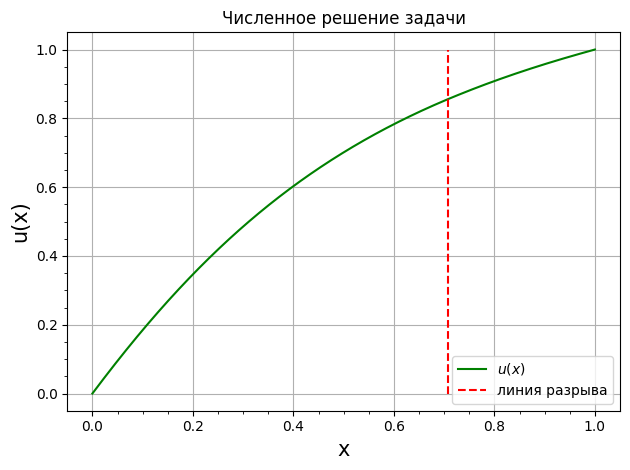

In [237]:
plot(x, u, 'Численное решение задачи')

Увеличим масштаб и увидим последствия разрыва

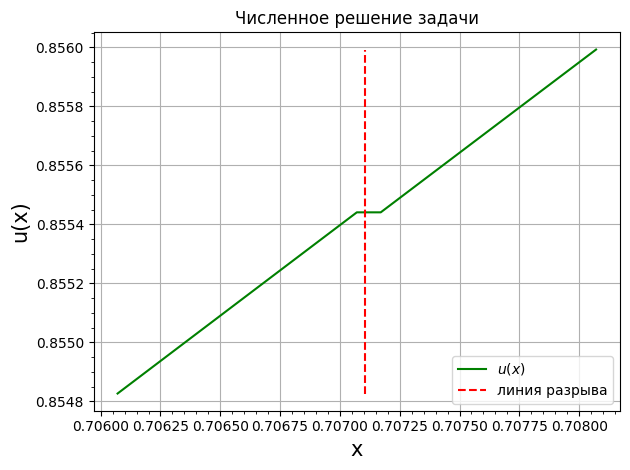

In [238]:
new_x = x[l_a-10:l_b+10]
new_u = u[l_a-10:l_b+10]
plot(new_x, new_u, 'Численное решение задачи')

Таким образом, было получено решение краевой задачи для одномерного стационарного уравнения теплопроводности с кусочно-непрерывными коэффициентами с помощью метода встречных прогонок.
